参考：  
Pythonで学ぶ確率・統計（ランダムウォーク）  
https://pianofisica.hatenablog.com/entry/2020/09/18/150000

mean: 9.923
stdev: 2.2654366473603282


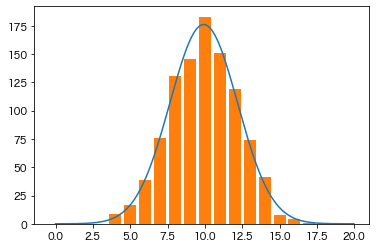

In [1]:
import random as rd
import matplotlib.pyplot as plt

def r(k): return rd.randint(0, 1)
def l(t): return sum(R)

N = 1000

L = []
for t in range(N):
    R = []
    for k in range(20):
        R.append(r(k))
    L.append(l(t))
    
# 正規分布
import statistics as st
m = st.mean(L)
s = st.stdev(L)
print('mean: {}'.format(m))
print('stdev: {}'.format(s))

import sympy as sp

x = [t*20/N for t in range(N)]
plt.plot(x, [1/(sp.sqrt(2*sp.pi*s**2))*sp.exp(-1/(2*s**2)*(t-m)**2)*N for t in x])
plt.hist(L, bins=20, range=(0, 20), rwidth=0.8, align='left')
plt.show()

3.132


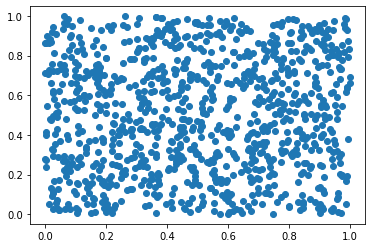

In [77]:
# モンテカルロ法
def x_pos(k): return rd.random()
def y_pos(k): return rd.random()
def c(k):
    if x_pos(k)**2 + y_pos(k)**2 <= 1:
        return 1
    else:
        return 0

s = []
P = 1000
R = []
for k in range(P):
    R.append([x_pos(k), y_pos(k)])
    s.append(c(k))

print(sum(s)/P*4)
x, y = zip(*R)
plt.scatter(x, y)
plt.show()

mean =  3.1410976
stdev =  0.01576272187923406


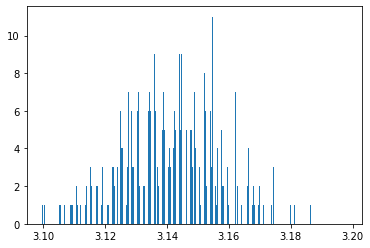

In [82]:
P = 10000
Q = 500

def x(k): return rd.random()
def y(k): return rd.random()
def c(k):
    if x(k)**2 + y(k)**2 <= 1:
        return 1
    else:
        return 0
    
T = []
for n in range(Q):
    s = []
    for k in range(P):
        s.append(c(k))
    T.append(sum(s)/P*4)

ave = st.mean(T)
dev = st.stdev(T)
print("mean = ", ave)
print("stdev = ", dev)
    
plt.hist(T, bins=500)
plt.show()

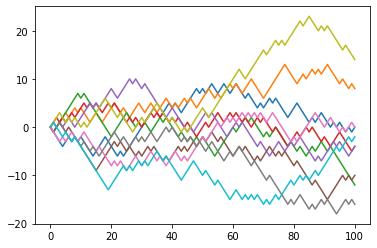

In [97]:
def r(k):
    return rd.randint(0, 1)

Q = []
N = 100
num = 10

def p(k):
    if r(k) == 1:
        return P[k] + 1
    else:
        return P[k] - 1
for n in range(num):
    P = [0]
    for k in range(N):
        P.append(p(k))
    Q.append(P)

fig, ax = plt.subplots()

for i in range(num):
    ax.plot(Q[i])
plt.show()

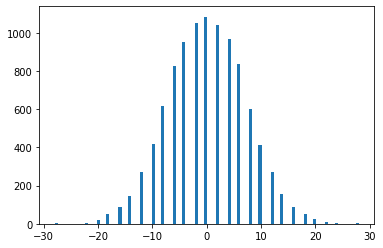

mean = 0.0288
stdev = 7.116588729406411


In [101]:
# 平均移動距離
t = 10000   # 試行回数
N = 100   # ステップ数

def r(k): return rd.randint(0, 1)

P = [0]
T = []

def p(k):
    if r(k) == 1:
        return P[k-1]+1
    else:
        return P[k-1]-1

for l in range(t):
    for k in range(N):
        P.append(p(k))
    T.append(P[N])
    P = [0]

fig, ax = plt.subplots()
ax.hist(T, bins=N)
plt.show()

m = st.mean(T)
s = st.stdev(T)
print('mean = {}'.format(m))
print('stdev = {}'.format(s))

[6.87149037 0.29097838]


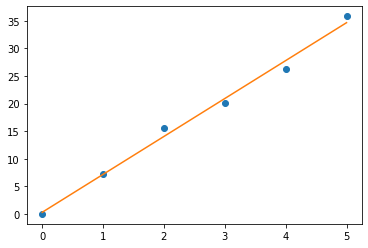

In [118]:
import random as rd
import statistics as st
import matplotlib.pyplot as plt
import numpy as np

S = 5  # nの最大値
d = 1  # nの刻み幅
t = 100  # 試行回数
N = 100  # ステップ数 N_1

def r(k): return rd.randint(0,1)  # 1 or 0
def n(s): return int((1+s*d)**2*N)  # ステップ数 N_2 = n**2 * n (n = 2~5)

def p(k):
    if r(k) == 1:
        return P[k-1]+1
    else:
        return P[k-1]-1

def q(s): return st.stdev(T)

P = [0]
T = []
U = [0]

for s in range(S):
    for l in range(t):
        for k in range(n(s)):
            P.append(p(k))
        T.append(P[n(s)])
        P = [0]
    U.append(q(s))
    T = []

X = [x for x in range(6)]
f = np.polyfit(X, U, 1)  # polyfit(x, y, deg) → y = ax + b の (a,b)
y = np.poly1d(f)(X)
print(f)

fig, ax = plt.subplots()
ax.plot(U, marker='o', linestyle='None')
ax.plot(y)
plt.show()


[0.94506491 0.04001948]
[0.04001948 0.98508439 1.9301493  2.87521421 3.82027911 4.76534402]


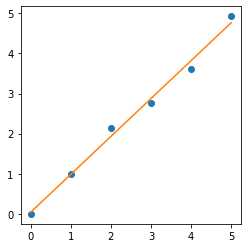

In [119]:
V = []

for s in range(S+1):
    V.append(U[s]/U[1])

fr = np.polyfit(X, V, 1)
yr = np.poly1d(fr)(X)
print(fr)
print(yr)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(V, marker='o', linestyle='None')
ax.plot(yr)
plt.show()
